# 1. 라이브러리 임포트

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

# 2. MNIST test dataset 가져오기

In [25]:
# "": 현재 폴더에 MNIST 있음
mnist_test=dset.MNIST("", train=False, transform=transforms.ToTensor(),
                     target_transform=None, download=True)

# 3. 대략적인 데이터 형태

mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  7


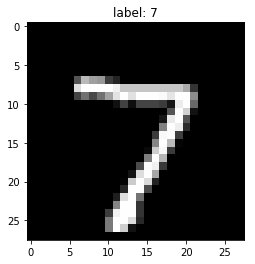

In [14]:
print "mnist_test 길이:", len(mnist_test)

# 데이터 하나 형태
image, label= mnist_test.__getitem__(0)  # 0번째 데이터
print "image data 형태:", image.size()
print "label: ", label

#그리기
img= image.numpy()  # image 타입을 numpy 로 변환 (1,28,28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

# 4. sigmoid, softmax 함수 구현

## $ g(z)= \frac{1}{1+e^{-z}} $

In [17]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

## $ softmax(x)_i= \frac{e^{x_i}}{\Sigma_{j}e^{x_j}} $

In [18]:
def softmax(x):
    e_x=np.exp(x)
    return e_x/np.sum(e_x)

# 5. 모델 선언

In [32]:
#Multi-layered perceptron
# # of units in each layer: 28*28 - 258 - 128 - 10
class MyMLP:
    def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
        # W^(1): layer1 -> layer2 에 매핑되는 Weight
        self.W1= np.zeros((n_hidden1, n_input), dtype=np.float32)  # W1(256, 28*28)
        self.b1= np.zeros((n_hidden1,), dtype=np.float32)
        
        self.W2= np.zeros((n_hidden2, n_hidden1), dtype=np.float32)  # W2(128, 256)
        self.b2= np.zeros((n_hidden2,), dtype=np.float32)
        
        self.W3= np.zeros((n_output, n_hidden2), dtype=np.float32)  # W3(10, 128)
        self.b3= np.zeros((n_output), dtype=np.float32)  #b3
        
    def __call__(self,x):
        # (1,28,28) -> (28*28)
        x= x.reshape(-1)  # 일렬로 피기
         
        h1= sigmoid(np.dot(self.W1, x)+ self.b1)  # W1(256, 28*28), x(28*28), b1(256) -> h1(256)
        h2= np.dot(self.W2,h1)+ self.b2  # W2(128, 256), h1(256), b2(128) -> h2(128)
        out= np.dot(self.W3,h2)+ self.b3  # W3(10, 128), h2(128), b3(10) -> out(10)
            
        return softmax(out)  # (10)

# 6. 모델 생성

In [33]:
model= MyMLP(28*28, 256, 128, 10)

In [34]:
print model.W1.shape, model.b1.shape
print model.W2.shape, model.b2.shape
print model.W3.shape, model.b3.shape

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


# 7. 미리 학습된 weight 로드

In [35]:
weights= np.load('./nets/mlp_weight.npz')
model.W1= weights['W1']
model.b1= weights['b1']
model.W2= weights['W2']
model.b2= weights['b2']
model.W3= weights['W3']
model.b3= weights['b3']

print model.W1.shape, model.b1.shape
print model.W2.shape, model.b2.shape
print model.W3.shape, model.b3.shape

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


# 8.테스트

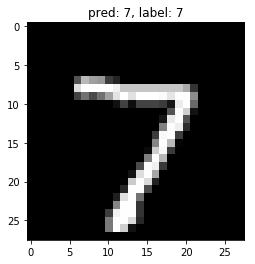

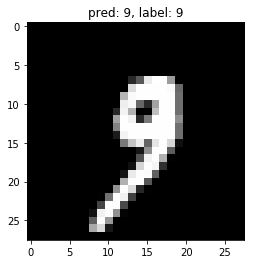

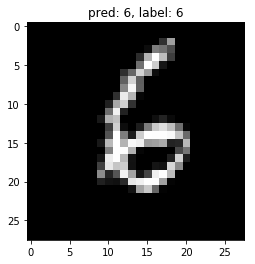

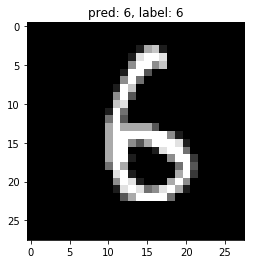

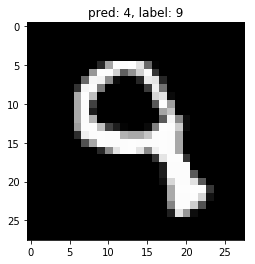

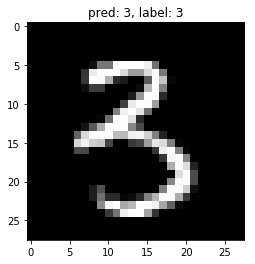

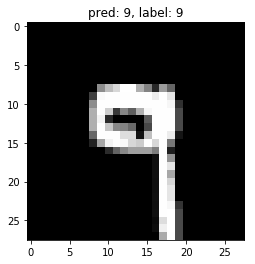

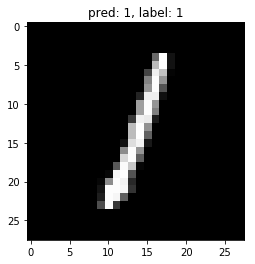

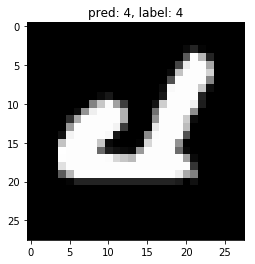

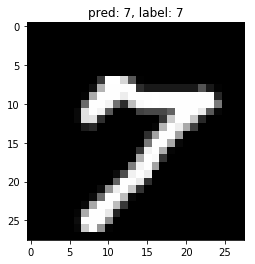

정확도: 91.91


In [37]:
mysum= 0

m= len(mnist_test)
cnt= 0
for i in range(m):
    image, label= mnist_test.__getitem__(i)  # 0번째 데이터
    output= model(image)
    
    if (i%1000==0):
        img= image.numpy()  # image 타입을 numpy로 변환 (1,28,28)
        pred_label= np.argmax(output)
        plt.title("pred: %d, label: %d" %(pred_label, label) )
        plt.imshow(img[0], cmap='gray')
        plt.show()
        
    cnt+=1
    mysum+= (np.argmax(output)==label)
print "정확도: %.2f" %( (float(mysum)/cnt)*100.0 )